#### **Optimalisasi UMKM Jawa Barat Berdasarkan Potensi Hasil Bumi Daerah dengan Analisa Hasil Segmentasi Menggunakan Model Machine Learning Clustering**


Team members : 
1. Afifah Qurrota-A'yun  
2. Andika Kristianto  
3. Tamara Coglitore  

### Library

In [1]:
# Import Library
import pandas as pd
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from scipy.stats import kruskal
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering

### Background


**Context**
  
World Bank memprediksi ekonomi global akan terancam resesi yang disebabkan oleh kenaikan suku bunga oleh bank sentral seluruh dunia. Resesi merupakan istilah ekonomi yang merepresentasikan kondisi perekonomian negara melambat atau memburuk, yakni negatifnya Produk Domestik Bruto (PDB), pengangguran meningkat, kenaikan harga kebutuhan sehari-hari, dan sebagainya. Prediksi tersebut tentunya menjadi ancaman bagi Indonesia yang akan ikut terdampak pada berbagai sektor yang diakibatkan oleh meningkatnya suku bunga acuan hampir 4 persen sehingga bunga kredit yang ditanggung oleh pelaku bisnis meningkat. Hal ini dapat berdampak pada melemahnya nilai mata uang lokal terhadap mata uang asing (Guénette et al., n.d.). Menurut Kementerian Pariwisata dan Ekonomi Kreatif (Kemenparekraf) Sandiaga Uno, menyampaikan bahwa ketidakpastian situasi ekonomi tersebut dapat diantisipasi (Muliantari, 2022). Salah satu langkah antisipasi adalah dengan bertopang pada UMKM dimana menurut Kementrian Koperasi Usaha Kecil dan Menengah (KUKM) mencatat sumbangan usaha mikro terhadap PDB sebesar 37,8% (Sahda, 2022).
  
Produk Domestik Bruto (PDB) merupakan suatu indikator yang bertujuan untuk melihat keadaan pertumbuhan ekonomi suatu negara ataupun daerah. Pertumbuhan ekonomi adalah kemampuan yang dimiliki suatu negara dalam menyediakan berbagai jenis barang ekonomi yang dibutuhan oleh penduduknya. Salah satu faktor yang turut berkontribusi dalam pertumbuhan ekonomi adalah dengan meningkatkan jumlah UMKM di berbagai daerah (Agustina & Hadi, 2021).
  
Usaha Mikro Kecil dan Menengah (UMKM) terdiri usaha mikro dengan kriteria usaha produktif milik orang peroranganan dengan kekayaan bersih 50 Juta Rupiah tidak termasuk tanah dan bangunan tempat usaha atau memiliki hasil penjualan maksimal 300 Juta Rupiah, sedangkan usaha kecil merupakan ekonomi produksi yang berdiri sendiri dilakukan oleh perorangan atau badan usaha dengan kekayaan bersih lebih dari 50 juta rupiah – 2,5 miliar rupiah, lalu usaha menengah merupakan usaha ekonomi produktif yang berdiri sendiri dan dilakukan oleh perorangan atau badan usaha dengan kekayaan bersih lebih dari 500 juta rupiah – 10 miliar rupiah tidak termasuk tanah dan bangunan tempat usaha atau memiliki hasil penjualan lebih dari 2,5 miliar rupiah, terakhir, adalah usaha besar yakni usaha ekonomi produktif yang dilakukan oleh badan usaha dengan kekayaan bersih lebih besar dari usaha menengah. Jenis-jenis umkm terbagi menjadi beberapa sektor ekonomi yakni pertanian, peternakan, perikanan, dan lain-lain (Hanim & Noorman, 2018).
  
UMKM dapat menjadi basis ekonomi nasional karena memiliki daya serap tenaga kerja yang cukup tinggi sehingga mampu mengurangi jumlah pengangguran. Selain itu, UMKM memiliki ketergantungan terhadap nilai mata uang Dollar yang kecil (Sahda, 2022) karena produk yang dihasilkan berasal dari sumber daya lokal. Keberadaan UMKM suatu daerah akan membantu menjawab kebutuhan pasar pada sektor utama, sehingga memiliki daya beli yang cukup stabil.
Oleh karena itu, demi menjaga pertumbuhan ekonomi dalam menghadapi resesi diperlukan media yang dapat memberikan rekomendasi untuk mengoptimalisasi pengembangan UMKM berdasarkan potensi hasil bumi daerah, dimana penelitian yang dilakukan berfokus pada daerah kabupaten/kota di Jawa Barat. Hal tersebut dapat digunakan untuk menentukan sektor UMKM yang tepat sasaran, dimana dalam merealisasikan media tersebut dapat dibangun dengan melibatkan sains data menggunakan metode klusterisasi machine learning.


**Problem Statement**  
  
Rumusan masalah yang diangkat yakni minimnya media pendukung untuk pengambilan keputusan dalam menjaga pertumbuhan ekonomi daerah termasuk Jawa Barat melalui optimalisasi UMKM daerah berdasarkan potensi hasil bumi, sehingga dilakukan penelitian terkait penciptaan media pendukung
untuk optimalisasi UMKM Jawa Barat berdasarkan Potensi Hasil Bumi Daerah dengan Analisa Hasil Segmentasi menggunakan Model Machine Learning Clustering.

**Scope and Limitation**  
  
Ruang lingkup penelitian analisa dan klusterisasi UMKM menggunakan data provinsi Jawa Barat berdasarkan Kabupaten/Kota tahun 2020, sebagai tahun yang merepresentasikan kondisi perekonomian krisis akibat COVID-19. Selain itu, digunakan limitasi sektor UMKM berjenis agribisnis, kuliner (makanan siap saji), makanan (makanan kemasan), minuman, dan obat-obatan yang dipilih berdasarkan sektor UMKM dominan antara lain pertanian, peternakan, dan perikanan.

**Goals**
  
Tujuan dari penelitian yang dilakukan yakni memudahkan pengambilan kebijakan oleh stakeholder dalam mengembangkan potensi wilayah unggulan untuk penciptaan/pengembangan UMKM agar tercipta daya saing produk di tingkat nasional/internasional serta citra daerah dalam upaya memasarkan daerah, melalui penyajian data hasil analisis dan prediksi secara ringkas pada dashboard.

**Analytic Approach**
  
Memvisualisasikan data untuk menganalisis persebaran data serta dilakukan pembuatan, evaluasi, dan implementasi model machine learning clustering sebagai *tool* yang dapat digunakan untuk segmentasi UMKM berdasarkan hasil bumi. 

Pada model machine learning metrik yang akan digunakan adalah Silhouette Score. Metrik digunakan untuk menentukan jumlah clustering yang optimal. Jumlah cluster yang ideal dengan metrik silhouette dilihat dari nilai koefisien dengan rentang -1 sampai 1. Nilai 1 menunjukkan nilai terbaik dimana data sangat compact pada clusternya, nilai 0 menunjukkan cluster saling tumpang tindih, dan nilai terburuk adalah -1. Silhouette score digunakan karena memiliki pendekatan yang lebih akurat dan *reliable* pada penentuan jumlah cluster.

### Dataset

Pada analisa ini, dataset yang digunakan didapat dari situs https://opendata.jabarprov.go.id/id yang menyajikan berbagai raw data. Raw data yang digunakan sesuai dengan limitasi penelitian antara lain, sebagai berikut:   
  
| Judul | Sumber Data |
| --- | --- |
| Jumlah Produksi Telur Ayam Buras Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-telur-ayam-buras-berdasarkan-kabupatenkota-di-jawa-barat |
| Jumlah Produksi Telur Ayam Puyuh Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-telur-puyuh-berdasarkan-kabupatenkota-di-jawa-barat | 
| Jumlah Produksi Telur Ayam Petelur Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-telur-ayam-petelur-berdasarkan-kabupatenkota-di-jawa-barat |
| Produksi Tanaman Tahunan Perkebunan Rakyat Komoditi Aren Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-tanaman-tahunan-perkebunan-rakyat-komoditi-aren-berdasarkan-kabupatenkota-di-jawa-barat |
| Jumlah Produksi Susu Sapi Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-susu-sapi-berdasarkan-kabupatenkota-di-jawa-barat |
| Produksi Tanaman Tahunan Perkebunan Rakyat Komoditi Pandan Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-tanaman-tahunan-perkebunan-rakyat-komoditi-pandan-berdasarkan-kabupatenkota-di-jawa-barat |
| Produksi Tanaman Tahunan Perkebunan Rakyat Komoditi Pinang Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-tanaman-tahunan-perkebunan-rakyat-komoditi-pinang-berdasarkan-kabupatenkota-di-jawa-barat |
| Produksi Tanaman Tahunan Perkebunan Rakyat Komoditi Pala Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-tanaman-tahunan-perkebunan-rakyat-komoditi-pala-berdasarkan-kabupatenkota-di-jawa-barat |
| Produksi Tanaman Tahunan Perkebunan Rakyat Komoditi Kopi Robusta Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-tanaman-tahunan-perkebunan-rakyat-komoditi-kopi-robusta-berdasarkan-kabupatenkota-di-jawa-barat |
| Produksi Tanaman Tahunan Perkebunan Rakyat Komoditi Kopi Arabika Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-tanaman-tahunan-perkebunan-rakyat-komoditi-kopi-arabika-berdasarkan-kabupatenkota-di-jawa-barat | 
| Produksi Tanaman Tahunan Perkebunan Rakyat Komoditi Kina Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-tanaman-tahunan-perkebunan-rakyat-komoditi-kina-berdasarkan-kabupatenkota-di-jawa-barat |
| Produksi Tanaman Tahunan Perkebunan Rakyat Komoditi Kelapa Hibrida Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-tanaman-tahunan-perkebunan-rakyat-komoditi-kelapa-hibrida-berdasarkan-kabupatenkota-di-jawa-barat | 
| Produksi Tanaman Tahunan Perkebunan Rakyat Komoditi Kayu Manis Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-tanaman-tahunan-perkebunan-rakyat-komoditi-kayu-manis-berdasarkan-kabupatenkota-di-jawa-barat |
| Produksi Ikan Tuna Hasil Tangkapan Laut Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-ikan-tuna-hasil-tangkapan-di-laut-berdasarkan-kabupatenkota-di-jawa-barat |
| Produksi Kulit Sapi Potong Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-kulit-sapi-potong-berdasarkan-kabupatenkota-di-jawa-barat |
| Produksi Tanaman Tahunan Perkebunan Besar Negara Komoditi Kelapa Sawit Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-tanaman-tahunan-perkebunan-besar-negara-komoditi-kelapa-sawit-berdasarkan-kabupatenkota-di-jawa-barat |
| Produksi Tanaman Tahunan Perkebunan Rakyat Komoditi Lada Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-tanaman-tahunan-perkebunan-rakyat-komoditi-lada-berdasarkan-kabupatenkota-di-jawa-barat |
| Jumlah Produksi Daging Kerbau Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-daging-kerbau-berdasarkan-kabupatenkota-di-jawa-barat |
| Jumlah Produksi Daging Ayam Buras Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-daging-ayam-buras-berdasarkan-kabupatenkota-di-jawa-barat |
| Jumlah Produksi Daging Domba Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-daging-domba-berdasarkan-kabupatenkota-di-jawa-barat |
| Jumlah Produksi Daging Ayam Petelur Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-daging-ayam-petelur-berdasarkan-kabupatenkota-di-jawa-barat |
| Jumlah Produksi Daging Ayam Pedaging Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-daging-ayam-pedaging-berdasarkan-kabupatenkota-di-jawa-barat |
| Jumlah Produksi Daging Kelinci Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-daging-kelinci-berdasarkan-kabupatenkota-di-jawa-barat |
| Jumlah Produksi Daging Kambing Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-daging-kambing-berdasarkan-kabupatenkota-di-jawa-barat |
| Jumlah Produksi Daging Itik Manila Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-daging-itik-manila-berdasarkan-kabupatenkota-di-jawa-barat | 
| Perkembangan Produksi Daging itik Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/perkembangan-produksi-daging-itik-berdasarkan-kabupatenkota-di-jawa-barat |
| Produksi Daging Sapi Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produksi-daging-sapi-berdasarkan-kabupatenkota-di-jawa-barat | 
| Jumlah Produksi Daging Puyuh Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-produksi-daging-puyuh-berdasarkan-kabupatenkota-di-jawa-barat |
| Jumlah Usaha Mikro, Kecil, dan Menengah (UMKM) Binaan Berdasarkan Jenis Usaha di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-usaha-mikro-kecil-dan-menengah-umkm-binaan-berdasarkan-jenis-usaha-di-jawa-barat | 
| Jumlah Usaha Mikro Kecil Menengah (UMKM) Berdasarkan Kabupaten/Kota dan Kategori Usaha di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/jumlah-usaha-mikro-kecil-menengah-umkm-berdasarkan-kabupatenkota-dan-kategori-usaha-di-jawa-barat |
| Produk Domestik Regional Bruto Atas Dasar Harga Berlaku Berdasarkan Kabupaten/Kota di Jawa Barat | https://opendata.jabarprov.go.id/id/dataset/produk-domestik-regional-bruto-atas-dasar-harga-berlaku-berdasarkan-kabupatenkota-di-jawa-barat |

Penjelasan mengenai variabel menurut dataset dibagi menjadi 2, yaitu dataset produksi hasil bumi dan UMKM.  
  
| Dataset | Variabel | Deskripsi |
| --- | --- | --- |
| Hasil Bumi | kode_provinsi | Kode Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik |
| Hasil Bumi | nama_provinsi | Lingkup data berasal dari wilayah Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks |
| Hasil Bumi | kode_kabupaten_kota | kode dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik | 
| Hasil Bumi | nama_kabupaten_kota | lingkup data berasal dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai penamaan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks |
| Hasil Bumi | jumlah_produksi | jumlah produksi dengan tipe data numerik |
|Hasil Bumi | satuan | satuan dari pengukuran jumlah produksi (TON/LEMBAR/KILOGRAM) dengan tipe data teks |
|Hasil Bumi | tahun | tahun produksi data dengan tipe data numerik |
| UMKM | kode_provinsi | Kode Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik |
| UMKM | nama_provinsi | Lingkup data berasal dari wilayah Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks |
| UMKM | kode_kabupaten_kota | kode dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik | 
| UMKM | nama_kabupaten_kota | lingkup data berasal dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai penamaan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks |
| UMKM | jenis_usaha | kategori jenis usaha dari umkm dengan tipe data teks |
| UMKM | jumlah_umkm | Jumlah usaha mikro, kecil, dan menengah dengan tipe data numerik|
| UMKM | satuan | satuan dari pengukuran jumlah usaha mikro, kecil, dan menengah dalam unit dengan tipe data teks |
| UMKM | tahun | tahun produksi data dengan tipe data numerik |
| PDB |	kode_provinsi |	Kode Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik |
| PDB |	nama_provinsi |	Lingkup data berasal dari wilayah Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks |
| PDB |	kode_kabupaten_kota | Kode dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik |
| PDB |	nama_kabupaten_kota | Lingkup data berasal dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai penamaan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks |
|PDB | pdrb_adhb |	Nilai produk domestik regional bruto atas dasar harga berlaku dengan tipe data numerik ||
| PDB |	satuan | Satuan dari pengukuran produk domestik regional bruto atas dasar harga berlaku dalam miliar rupiah dengan tipe data teks |
| PDB |	tahun |	Tahun produksi data dengan tipe data numerik |





#### Pembuatan Dataset

In [2]:
# Menggabungkan beberapa Data Hasil Bumi per Tahun 2020
nama_file = ('01. Telur ayam buras.csv','02. Telur puyuh.csv', '03. Telur ayam petelur.csv', '04. Aren.csv','05. Susu Sapi.csv','06. Pandan.csv','07. Pinang.csv','08. Pala.csv','09. Kopi Robusta.csv','10. Kopi Arabika.csv','11. Kina.csv','12. Kelapa Hibrida.csv', '13. Kayu Manis.csv', '14. Ikan Tuna.csv', '15. Sapi Potong.csv', '16. Kelapa Sawit.csv', '17. Lada.csv', '18. Daging Kerbau.csv', '19. Daging Ayam Buras.csv', '20. Daging Domba.csv','21. Daging Ayam Petelur.csv', '22. Daging Ayam Pedaging.csv', '23. Daging Kelinci.csv','24. Daging Kambing.csv','25. Daging Itik Manila.csv', '26. Daging Itik.csv','27. Daging Sapi.csv', '28. Daging Puyuh.csv')

files = dict()
for i in nama_file: 
    df = pd.read_csv(i)
    files[i] = df
    files[i] = files[i][files[i]['tahun']==2020]
    files[i[4:-4]] = files[i]
    del files[i]

In [3]:
# Melihat List Kategori Hasil Bumi
files.keys()

dict_keys(['Telur ayam buras', 'Telur puyuh', 'Telur ayam petelur', 'Aren', 'Susu Sapi', 'Pandan', 'Pinang', 'Pala', 'Kopi Robusta', 'Kopi Arabika', 'Kina', 'Kelapa Hibrida', 'Kayu Manis', 'Ikan Tuna', 'Sapi Potong', 'Kelapa Sawit', 'Lada', 'Daging Kerbau', 'Daging Ayam Buras', 'Daging Domba', 'Daging Ayam Petelur', 'Daging Ayam Pedaging', 'Daging Kelinci', 'Daging Kambing', 'Daging Itik Manila', 'Daging Itik', 'Daging Sapi', 'Daging Puyuh'])

In [4]:
# Melihat Contoh Data Hasil Bumi
files['Telur ayam buras'].head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_produksi,satuan,tahun
189,190,32,JAWA BARAT,3201,KABUPATEN BOGOR,4233,TON,2020
190,191,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,868,TON,2020
191,192,32,JAWA BARAT,3203,KABUPATEN CIANJUR,10406,TON,2020
192,193,32,JAWA BARAT,3204,KABUPATEN BANDUNG,4228,TON,2020
193,194,32,JAWA BARAT,3205,KABUPATEN GARUT,5494,TON,2020


In [5]:
# Data UMKM Jawa Barat berdasarkan Kabupaten/Kota
df = pd.read_csv('30. UMKM.csv')
df2 = pd.read_csv('31. UMKM Binaan.csv')
df = df[df['tahun']==2020]
df2 = df2[df2['tahun']==2020]
df2.rename(columns={'jenis_usaha' : 'kategori_usaha'}, inplace = True)
df = df[(df['kategori_usaha'] == 'MAKANAN') | (df['kategori_usaha'] == 'MINUMAN') | (df['kategori_usaha'] == 'KULINER')]
df2 = df2[(df2['kategori_usaha'] == 'MAKANAN') | (df2['kategori_usaha'] == 'MINUMAN') | (df2['kategori_usaha'] == 'KULINER')| (df2['kategori_usaha'] == 'AGRIBISNIS') | (df2['kategori_usaha'] == 'OBAT-OBATAN')]


In [6]:
# Melihat Data UMKM
display(df.head(),df2.head())

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,jumlah_umkm,satuan,tahun
816,817,32,JAWA BARAT,3201,KABUPATEN BOGOR,KULINER,170630,UNIT,2020
817,818,32,JAWA BARAT,3201,KABUPATEN BOGOR,MAKANAN,124801,UNIT,2020
818,819,32,JAWA BARAT,3201,KABUPATEN BOGOR,MINUMAN,23152,UNIT,2020
826,827,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,KULINER,122384,UNIT,2020
827,828,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,MAKANAN,89513,UNIT,2020


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,kategori_usaha,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,AGRIBISNIS,11,UNIT,2020
11,12,32,JAWA BARAT,3201,KABUPATEN BOGOR,KULINER,52,UNIT,2020
12,13,32,JAWA BARAT,3201,KABUPATEN BOGOR,MAKANAN,104,UNIT,2020
13,14,32,JAWA BARAT,3201,KABUPATEN BOGOR,MINUMAN,14,UNIT,2020
14,15,32,JAWA BARAT,3201,KABUPATEN BOGOR,OBAT-OBATAN,0,UNIT,2020


In [7]:
# Penggabungan data UMKM
umkm = df.append(df2).reset_index(drop=True)
umkm = umkm.iloc[:,4:7]
umkm = umkm.groupby(by=['kategori_usaha','nama_kabupaten_kota']).sum().unstack(level=0)
umkm.columns = umkm.columns.droplevel(0)
Dataset = umkm.reset_index().rename_axis(None, axis=1)

In [8]:
# Penggabungan data UMKM dengan Hasil Bumi
judul = files.keys()
for i in judul:
    Dataset = pd.merge(Dataset, files[i].iloc[:,4:6], on =['nama_kabupaten_kota'])
    Dataset.rename(columns = {Dataset.columns[-1]: i}, inplace = True)

In [9]:
# Melihat Dataset Jumlah UMKM per kategori dan Jumlah Hasil Bumi
Dataset.head()

,nama_kabupaten_kota,AGRIBISNIS,KULINER,MAKANAN,MINUMAN,OBAT-OBATAN,Telur ayam buras,Telur puyuh,Telur ayam petelur,Aren,...,Daging Ayam Buras,Daging Domba,Daging Ayam Petelur,Daging Ayam Pedaging,Daging Kelinci,Daging Kambing,Daging Itik Manila,Daging Itik,Daging Sapi,Daging Puyuh
0,KABUPATEN BANDUNG,0,160772,117700,21820,0,4228,55,7319,548,...,2024,349,357,38397,26,13,28,247,7495847,6
1,KABUPATEN BEKASI,5,105182,76941,14272,0,352,0,2832,0,...,643,512,100,8763,0,282,0,184,1680492,0
2,KABUPATEN BOGOR,11,170682,124905,23166,0,4233,142,231900,685,...,2027,805,8280,170479,0,371,104,104,9908119,15
3,KABUPATEN CIAMIS,0,63635,46591,8634,0,3218,108,43209,329,...,1541,218,2107,23537,7,173,0,137,1219172,12
4,KABUPATEN CIANJUR,16,114126,83553,15504,4,10406,52,67298,18873,...,4983,751,3282,55239,20,72,0,617,2229888,6


In [10]:
# Melihat satuan Hasil Bumi
judul = files.keys()
a =[]
for i in judul:
    a.append([i, files[i]['satuan'].unique()])

dfDesc = pd.DataFrame(columns=['data','unique'],
                     data=a)
dfDesc

,data,unique
0,Telur ayam buras,[TON]
1,Telur puyuh,[TON]
2,Telur ayam petelur,[TON]
3,Aren,[TON]
4,Susu Sapi,[TON]
5,Pandan,[TON]
6,Pinang,[TON]
7,Pala,[TON]
8,Kopi Robusta,[TON]
9,Kopi Arabika,[TON]


* **Menyetarakan Satuan menjadi TON**

In [11]:
# Melihat isi data Sapi Potong
Dataset['Sapi Potong']

0     28792
1         0
2         0
3      5239
4      8481
5     17062
6      3160
7      8979
8     12012
9      6571
10     9698
11     6001
12     5591
13        0
14     6711
15    34732
16     2750
17    12945
18        0
19     2180
20     2521
21    27825
22     6242
23    13693
Name: Sapi Potong, dtype: int64

In [12]:
# Mengubah Satuan Sapi Potong dari Lembar menjadi TON (1 Lembar -+ 20kg)
Dataset['Sapi Potong'] = Dataset.loc[:,'Sapi Potong'] * 20 / 1000    
Dataset['Sapi Potong']

0     575.84
1       0.00
2       0.00
3     104.78
4     169.62
5     341.24
6      63.20
7     179.58
8     240.24
9     131.42
10    193.96
11    120.02
12    111.82
13      0.00
14    134.22
15    694.64
16     55.00
17    258.90
18      0.00
19     43.60
20     50.42
21    556.50
22    124.84
23    273.86
Name: Sapi Potong, dtype: float64

In [13]:
# Melihat isi data Daging Sapi
Dataset['Daging Sapi']

0     7495847
1     1680492
2     9908119
3     1219172
4     2229888
5     4371888
6      731360
7     2117055
8     1242580
9     1562949
10    2272862
11    1537769
12    1272156
13    1876851
14    1561650
15    9002468
16     710283
17    3249839
18    4312524
19     507286
20     617544
21    7359351
22    1601432
23    3659518
Name: Daging Sapi, dtype: int64

In [14]:
# Mengubah satuan Daging Sapi dari kg menjadi TON
Dataset['Daging Sapi'] = Dataset.loc[:,'Daging Sapi']/ 1000    
Dataset['Daging Sapi']

0     7495.847
1     1680.492
2     9908.119
3     1219.172
4     2229.888
5     4371.888
6      731.360
7     2117.055
8     1242.580
9     1562.949
10    2272.862
11    1537.769
12    1272.156
13    1876.851
14    1561.650
15    9002.468
16     710.283
17    3249.839
18    4312.524
19     507.286
20     617.544
21    7359.351
22    1601.432
23    3659.518
Name: Daging Sapi, dtype: float64

In [15]:
# Melihat Dataset
Dataset

,nama_kabupaten_kota,AGRIBISNIS,KULINER,MAKANAN,MINUMAN,OBAT-OBATAN,Telur ayam buras,Telur puyuh,Telur ayam petelur,Aren,...,Daging Ayam Buras,Daging Domba,Daging Ayam Petelur,Daging Ayam Pedaging,Daging Kelinci,Daging Kambing,Daging Itik Manila,Daging Itik,Daging Sapi,Daging Puyuh
0,KABUPATEN BANDUNG,0,160772,117700,21820,0,4228,55,7319,548,...,2024,349,357,38397,26,13,28,247,7495.847,6
1,KABUPATEN BEKASI,5,105182,76941,14272,0,352,0,2832,0,...,643,512,100,8763,0,282,0,184,1680.492,0
2,KABUPATEN BOGOR,11,170682,124905,23166,0,4233,142,231900,685,...,2027,805,8280,170479,0,371,104,104,9908.119,15
3,KABUPATEN CIAMIS,0,63635,46591,8634,0,3218,108,43209,329,...,1541,218,2107,23537,7,173,0,137,1219.172,12
4,KABUPATEN CIANJUR,16,114126,83553,15504,4,10406,52,67298,18873,...,4983,751,3282,55239,20,72,0,617,2229.888,6
5,KABUPATEN CIREBON,14,114972,84172,15605,1,2901,50,1290,0,...,1389,1662,63,24903,4,78,141,455,4371.888,5
6,KABUPATEN GARUT,7,117941,86322,16005,0,5494,0,36311,16168,...,8731,31,4366,31142,0,327,0,44,731.360,0
7,KABUPATEN INDRAMAYU,8,86961,63625,11804,0,3999,29,991,0,...,1915,360,48,36687,2,165,507,1795,2117.055,3
8,KABUPATEN KARAWANG,1,106324,77815,14439,1,1184,3,1375,0,...,434,118,72,71539,0,18,0,1,1242.580,0
9,KABUPATEN KUNINGAN,1,43250,31637,5872,0,1133,251,28631,1440,...,542,1348,1396,26297,6,35,2,54,1562.949,27


In [16]:
# Export Dataset menjadi csv
Dataset.to_csv('Dataset UMKM dan Jumlah Hasil Bumi.csv')
dataset = Dataset

In [17]:
# Menambah additional data
gdp=pd.read_csv('32. gdp.csv')

In [18]:
# Memilih tahun 2020 dan kolom yang diperlukan
gdp=gdp[gdp['tahun']==2020].reset_index(drop=True)
gdp=gdp[['nama_kabupaten_kota','pdrb_adhb']]

In [19]:
# Menggabungkan data
dataset=pd.merge(dataset,gdp,'left',on='nama_kabupaten_kota')

### Exploratory Data Analysis

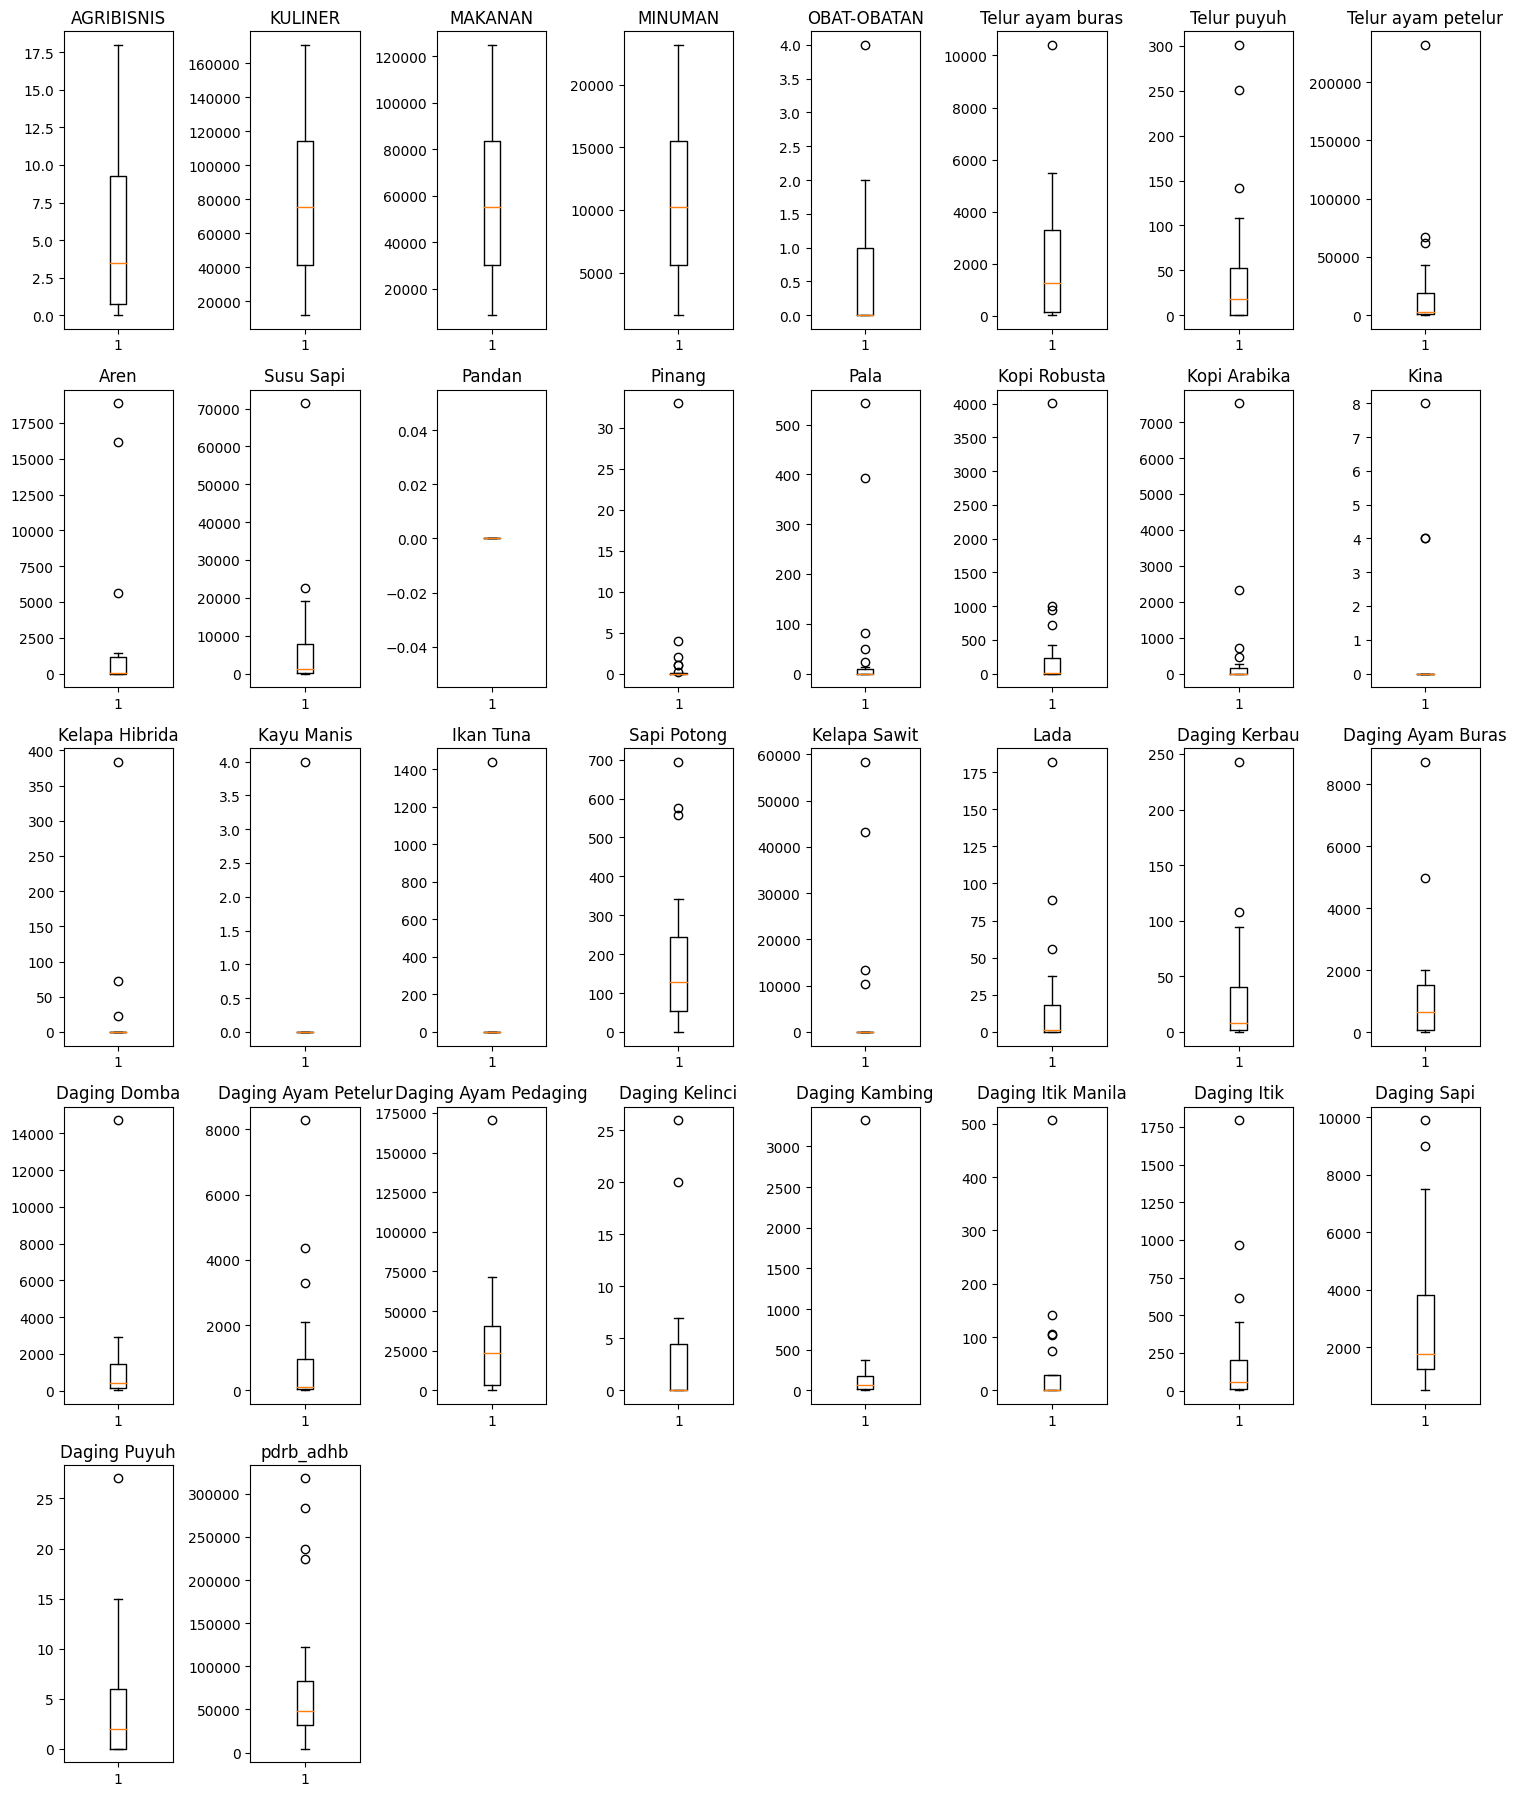

In [20]:
# Distribusi data
plt.figure(figsize=(15,25))
for i in range(0,len(dataset.columns)-1):
  plt.subplot(7,len(dataset.columns)//4,i+1)
  plt.boxplot(dataset.iloc[:,i+1])
  plt.title(dataset.columns[i+1])
  plt.tight_layout()

Berdasarkan grafik boxplot dapat diketahui bahwa persebaran data pada dataset tidak normal yang ditunjukkan terdapat beberapa outlier yang menghasilkan skewness pada data. Oleh karena itu, dibuatlah grafik heatmap korelasi spearman untuk mengetahui apakah terdapat hubungan antar variabel.

<AxesSubplot:>

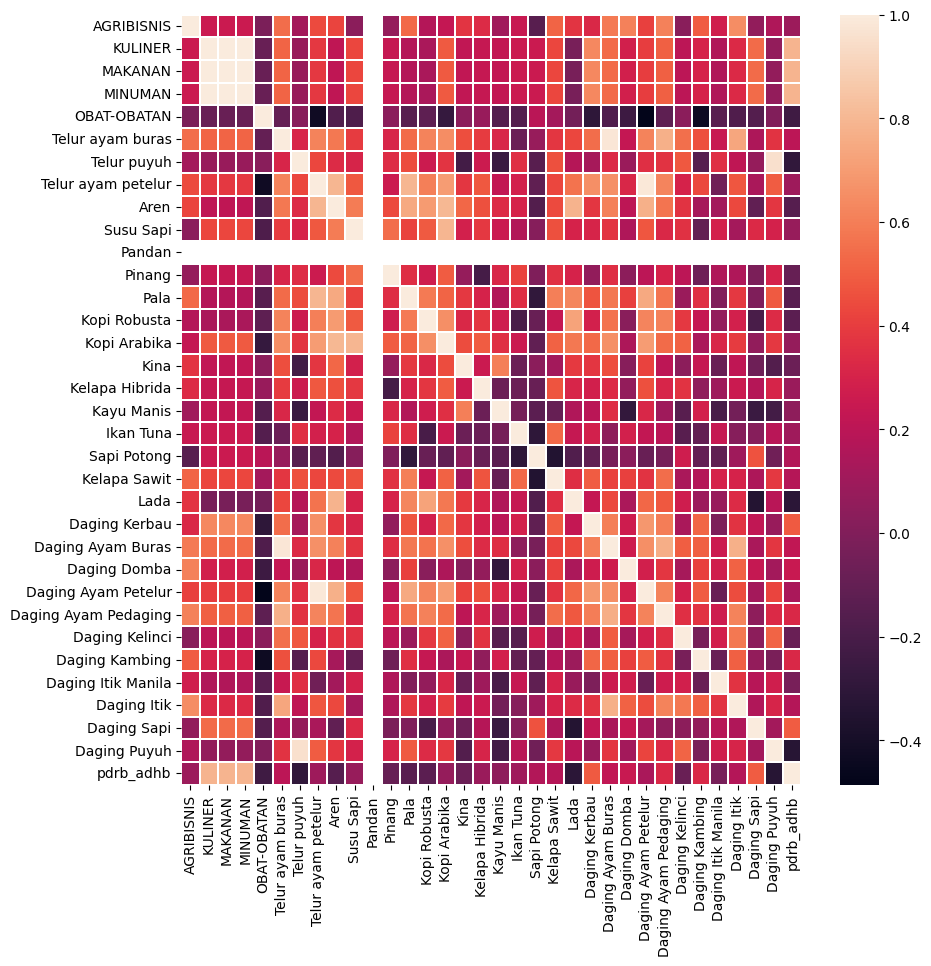

In [21]:
# Korelasi
plt.figure(figsize=(10,10))
sns.heatmap(dataset.iloc[:,1:].corr('spearman'),linewidths=0.1)

Diketahui bahwa variabel pdrb_adhb memiliki korelasi yang tinggi dengan variabel kuliner, makanan, dan minuman, dimana Produk Domestik Regional Bruto (PDRB) dipengaruhi oleh jumlah umkm terutama pada sektor kuliner, makanan, dan minuman, sehingga semakin banyak jumlah UMKM pada sektor tersebut maka semakin tinggi pula besar PDRB nya.

In [22]:
# dataset
dfgambar=dataset.copy()
hasilbumi=dfgambar.iloc[:,5:len(dfgambar.columns)-2].T.sum()
dfgambar['hasilbumi']=hasilbumi
dfgambar=dfgambar.iloc[:,0:6].join(dfgambar['hasilbumi'])

Text(0.5, 1.0, 'Jumlah Hasil Bumi per Kabupaten/Kota')

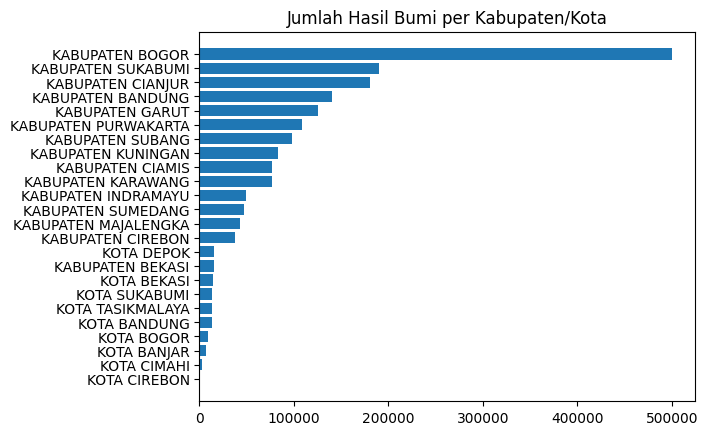

In [23]:
# Jumlah hasil bumi per Kabupaten/Kota
plt.barh(width=dfgambar['hasilbumi'].sort_values(),y=dfgambar.iloc[dfgambar['hasilbumi'].sort_values().index,0])
plt.title('Jumlah Hasil Bumi per Kabupaten/Kota')

Dapat diketahui bahwa daerah yang memiliki jumlah hasil bumi terbanyak adalah Kabupaten Bogor sedangkan daerah dengan jumlah hasil bumi paling sedikit adalah Kota Cirebon, dan dapat diketahui pula bahwa daerah kabupaten memiliki hasil bumi yang lebih banyak dibandingkan daerah kota

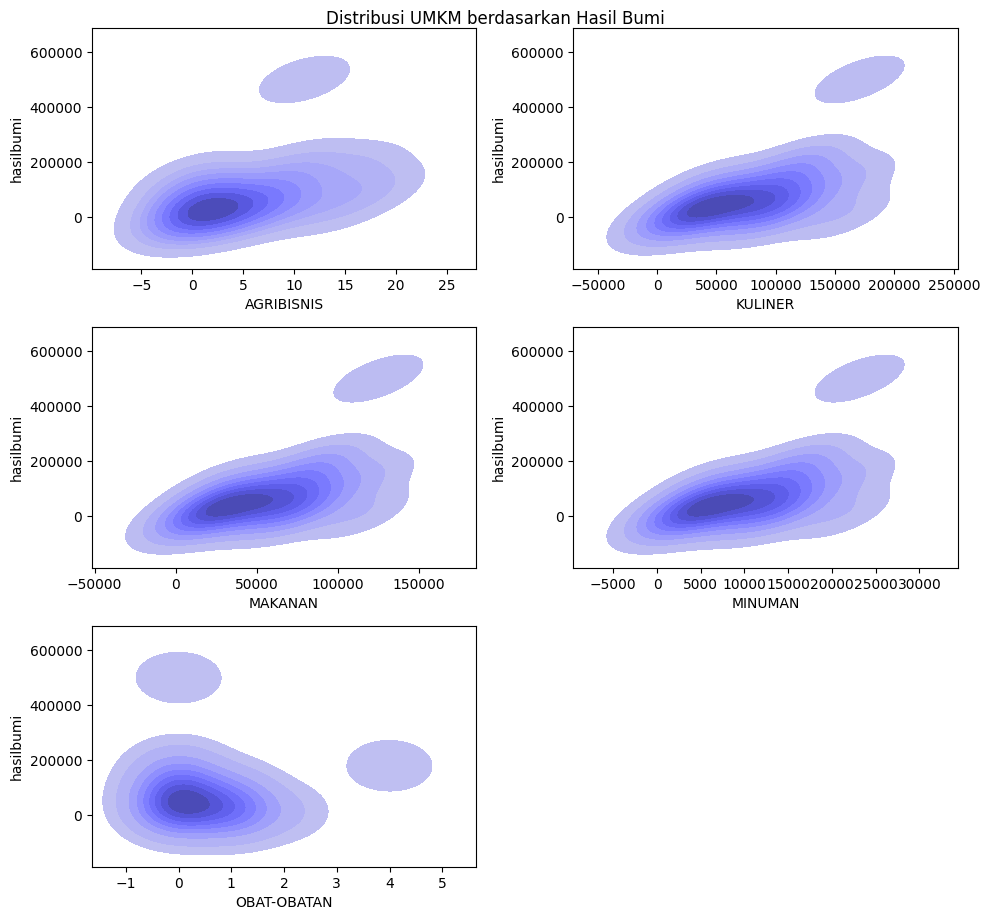

In [24]:
p = ['AGRIBISNIS','KULINER','MAKANAN','MINUMAN','OBAT-OBATAN']
o = 1
plt.figure(figsize=(10,15))
for i in p:
    plt.subplot(5,2,o)
    sns.kdeplot(dfgambar[i],dfgambar['hasilbumi'], color = 'b', fill = True)
    o+=1
    plt.tight_layout()
    plt.suptitle('Distribusi UMKM berdasarkan Hasil Bumi')

Berdasarkan KDE (Kernel Density Estimate), menunjukkan estimasi kepadatan data pada grafik yang direpresesntasikan dengan warna, dimana semakin gelap warna maka semakin padat suatu populasi data. Berdasarkan grafik dapat dilihat bahwa didistribusi dari dataset jenis UMKM dan hasil bumi berbanding lurus, dimana pada grafik menunjukkan semakin banyak hasil bumi maka akan semakin banyak jumlah UMKM, terkecuali sektor UMKM obat-obatan tidak dipengaruhi oleh banyaknya hasil bumi.

### Modeling - Cluster

Model machine learning yang digunakan pada penelitian berjenis unsupervised dikarenakan data tidak memiliki target dengan metode clustering. Model yang diimplementasikan menggunakan metode Agglomerative dan K-Means, Agglomerative merupakan model yang menggunakan strategi pengelompokan hirarki dimulai dengan setiap objek dalam satu cluster terpisah kemudian membentuk cluster yang semakin membesar, sedangkan, K-Means merupakan metode clustering dengan menggunakan konsep rata-rata jarak antar data poin untuk mengetahui seberapa dekat suatu data poin dengan pusat cluster.

#### K-Means Min Max Scaler



Scaling data dilakukan dengan beberapa cara salah satunya MinMaxScaler yang akan mengubah skala minimal dan maksimal data dari 0 – 1 untuk menormalisasi skala data numerikal pada dataset.

In [25]:
# Data Train dengan minmax scaler
mm=MinMaxScaler()
temp=mm.fit_transform(dataset.iloc[:,1:len(dataset.columns)])
train=pd.DataFrame(index=dataset.iloc[:,0],data=temp)
train.columns=dataset.columns[1:len(dataset.columns)]

Digunakan silhouette score untuk evaluasi serta memilih jumlah cluster.

In [26]:
# Silhouette score
x=train.values
sill=[]
for i in range(3,10):
    model=KMeans(n_clusters=i,random_state=3)
    dffit=model.fit(x)
    labels=dffit.labels_
    sill.append([silhouette_score(x,labels,random_state=3),i])


In [27]:
# Cek silhouette scpre
sillkmeans1 = sill
sillkmeans1

[[0.17561869868875513, 3],
 [0.1462385717153735, 4],
 [0.1668064321690085, 5],
 [0.15750162363256984, 6],
 [0.145679644882539, 7],
 [0.14558914687789584, 8],
 [0.1644591704703245, 9]]

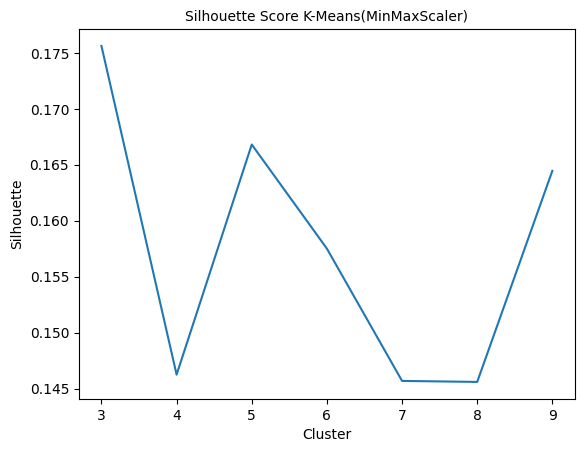

In [28]:
# Cek Silhouette Score
x=[x for x,y in sill]
y=[y for x,y in sill]
ax = sns.lineplot(x=y,y=x)
ax.set_title('Silhouette Score K-Means(MinMaxScaler)',size=10)
ax.set_xlabel( "Cluster")
ax.set_ylabel( "Silhouette")
plt.show()

Grafik silhouette score tertinggi dengan nilai 0,176 memiliki jumlah kluster sebanyak 3. Setelah mengetahui jumlah kluster dilakukan reduksi dimensi dengan PCA (Principal Componen Analyst) untuk mempermudah melihat pembagian kluster berdasarkan kabupaten/kota.

In [29]:
# Menggunakan PCA
pca=PCA(n_components=2)
x=train.values
temp=pca.fit_transform(x)
model2=KMeans(n_clusters=3,random_state=3).fit(temp)

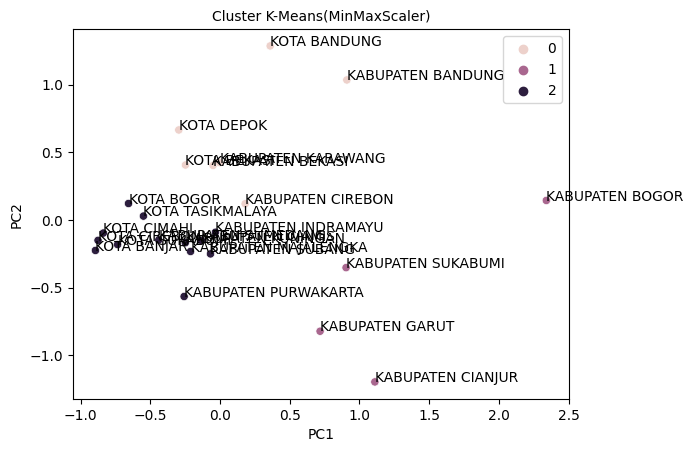

In [30]:
# Scatterplot
ax = sns.scatterplot(x=temp[:,0],y=temp[:,1],hue=model2.labels_)
[plt.text(x=temp[i,0],y=temp[i,1],s=dataset.iloc[i,0]) for i in range(0,dataset.shape[0])]
ax.set_title('Cluster K-Means(MinMaxScaler)',size=10)
ax.set_xlabel( "PC1")
ax.set_ylabel( "PC2")
plt.show()

Pada scatter plot dapat dilihat bahwa terdapat data terkluster kurang baik dikarenakan nilai silhouette score yang rendah, hal tersebut dapat disebabkan oleh proses scaling yang menggunakan MinMaxScaler dimana scaler tersebut sensitif dengan outlier.

#### K-Means Robust Scaler

RobustScaler digunakan karena pada dataset memiliki outlier dan bertujuan untuk menghindari hasil klusterisasi yang bias diakibatkan oleh outlier. RobustScaler menggunakan interquartile range yang akan menghapus median untuk melakukan skala data berdasarkan quantil range.

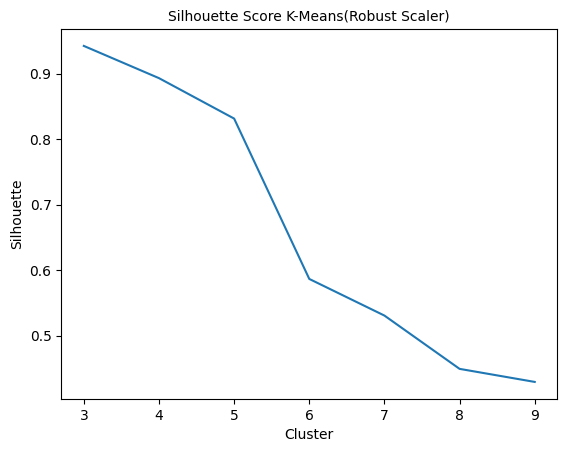

In [31]:
# Kmeans dengan robust scaler
mm=RobustScaler()
temp=mm.fit_transform(dataset.iloc[:,1:len(dataset.columns)])
train=pd.DataFrame(index=dataset.iloc[:,0],data=temp)
train.columns=dataset.columns[1:len(dataset.columns)]

x=train.values
sill=[]
for i in range(3,10):
    model=KMeans(n_clusters=i,random_state=3)
    dffit=model.fit(x)
    labels=dffit.labels_
    sill.append([silhouette_score(x,labels,random_state=3),i])
x=[x for x,y in sill]
y=[y for x,y in sill]
ax = sns.lineplot(x=y,y=x)
ax.set_title('Silhouette Score K-Means(Robust Scaler)',size=10)
ax.set_xlabel( "Cluster")
ax.set_ylabel( "Silhouette")
plt.show()

In [32]:
# Nilai silhouette score
sillkmeans2 = sill
sillkmeans2

[[0.9422291010755717, 3],
 [0.893030517320939, 4],
 [0.831311897484181, 5],
 [0.5864816853884035, 6],
 [0.530550683656728, 7],
 [0.44918337981452877, 8],
 [0.42925506244827877, 9]]

Dapat dilihat dari grafik silhouette score, tertinggi dengan nilai 0,94 dengan jumlah kluster sebanyak 3. Silhouette score dengan menggunakan RobustScaler jauh lebih besar dibandingkan MinMaxScaler hal tersebut disebabkan oleh RobustScaler tidak sensitif dengan outlier.

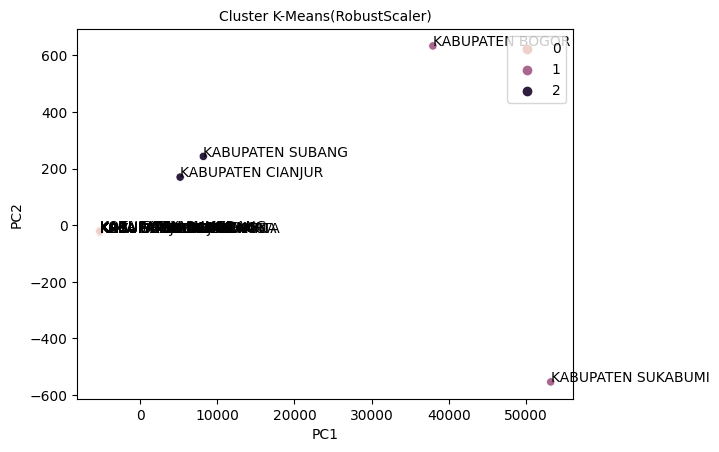

In [33]:
# Menggunakan pca
pca=PCA(n_components=2)
x=train.values
temp=pca.fit_transform(x)
model2=KMeans(n_clusters=3,random_state=3).fit(temp)
ax = sns.scatterplot(x=temp[:,0],y=temp[:,1],hue=model2.labels_)
[plt.text(x=temp[i,0],y=temp[i,1],s=dataset.iloc[i,0]) for i in range(0,dataset.shape[0])]
ax.set_title('Cluster K-Means(RobustScaler)',size=10)
ax.set_xlabel( "PC1")
ax.set_ylabel( "PC2")
plt.show()

Setelah mengetahui jumlah kluster dilakukan reduksi dimensi dengan PCA (Principal Componen Analyst) untuk mempermudah melihat pembagian kluster berdasarkan kabupaten/kota. Pada scatter plot dapat dilihat bahwa data tidak terkluster dengan baik atau bersifat tumpang tindih meskipun nilai silhouette score yang didapat lebih baik. Oleh karena itulah, dilakukan pengujian dengan metode clustering yang berbeda yakni agglomerative menggunakan RobustScaler.

#### Agglomerative Robust Scaler

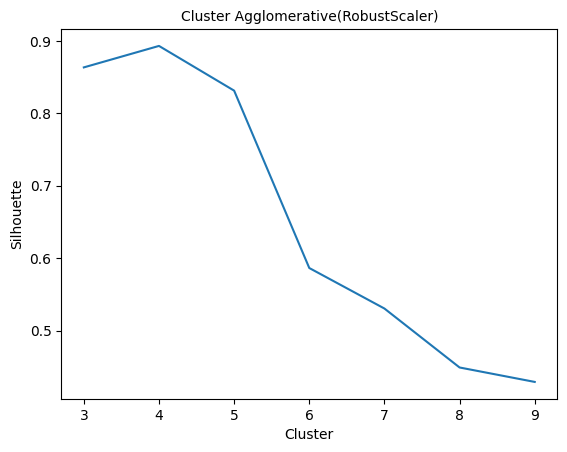

In [34]:
# Silhouette score
m=RobustScaler()
temp=mm.fit_transform(dataset.iloc[:,1:len(dataset.columns)])
train=pd.DataFrame(index=dataset.iloc[:,0],data=temp)
train.columns=dataset.columns[1:len(dataset.columns)]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
x=train.values
sill=[]
for i in range(3,10):
    model=AgglomerativeClustering(n_clusters=i,linkage='average')
    dffit=model.fit(x)
    labels=dffit.labels_
    sill.append([silhouette_score(x,labels),i])
x=[x for x,y in sill]
y=[y for x,y in sill]
ax = sns.lineplot(x=y,y=x)
ax.set_title('Cluster Agglomerative(RobustScaler)',size=10)
ax.set_xlabel( "Cluster")
ax.set_ylabel( "Silhouette")
plt.show()

In [35]:
# Melihat nilai silhouette score
sillagg = sill
sillagg

[[0.8633916994998699, 3],
 [0.893030517320939, 4],
 [0.831311897484181, 5],
 [0.5864816853884035, 6],
 [0.530550683656728, 7],
 [0.44918337981452877, 8],
 [0.42925506244827877, 9]]

In [36]:
train=dataset.iloc[:,0:5]
train['Hasil Bumi']=dataset.iloc[:,5:len(dataset.columns)-1].T.sum()
train['PDRB']=dataset['pdrb_adhb']

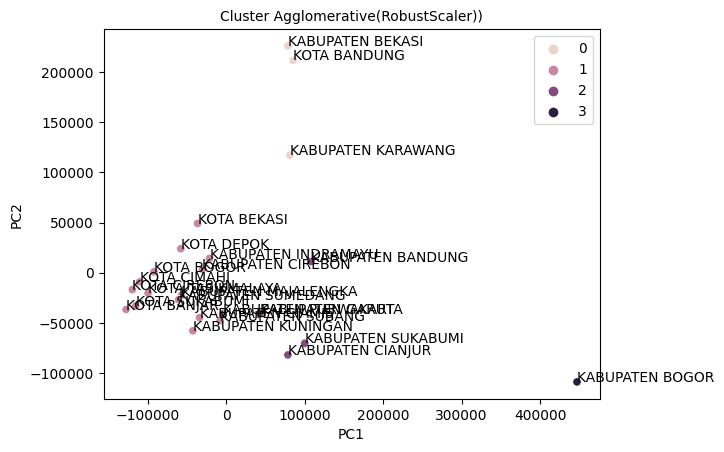

In [37]:
# Check PCA
pca=PCA(n_components=2)
x=train.iloc[:,1:].values
temp=pca.fit_transform(x)
model2=AgglomerativeClustering(n_clusters=4,linkage='average').fit(temp)
ax = sns.scatterplot(x=temp[:,0],y=temp[:,1],hue=model2.labels_)
[plt.text(x=temp[i,0],y=temp[i,1],s=dataset.iloc[i,0]) for i in range(0,dataset.shape[0])]
ax.set_title('Cluster Agglomerative(RobustScaler))',size=10)
ax.set_xlabel( "PC1")
ax.set_ylabel( "PC2")
plt.show()

Nilai silhouette score tertinggi yang didapatkan pada pengujian ini adalah 0,89 dengan jumlah kluster 4. Kemudian dilakukan reduksi data menggunakan PCA untuk melihat persebaran data pada scatter plot yang dapat disimpulkan bahwa data telah terkluster dengan baik. Oleh karena itu, metode yang akan digunakan untuk clustering adalah Agglomerative dengan RobustScaler.

#### Cluster Analysis

In [38]:
# Silhouette Score
display(sillkmeans1, sillkmeans2, sillagg)

[[0.17561869868875513, 3],
 [0.1462385717153735, 4],
 [0.1668064321690085, 5],
 [0.15750162363256984, 6],
 [0.145679644882539, 7],
 [0.14558914687789584, 8],
 [0.1644591704703245, 9]]

[[0.9422291010755717, 3],
 [0.893030517320939, 4],
 [0.831311897484181, 5],
 [0.5864816853884035, 6],
 [0.530550683656728, 7],
 [0.44918337981452877, 8],
 [0.42925506244827877, 9]]

[[0.8633916994998699, 3],
 [0.893030517320939, 4],
 [0.831311897484181, 5],
 [0.5864816853884035, 6],
 [0.530550683656728, 7],
 [0.44918337981452877, 8],
 [0.42925506244827877, 9]]

Metode clustering yang dipilih yaitu Agglomerative dengan Robust Scaler yang memiliki silhouette score 0.89 dengan jumlah cluster 4. 

In [39]:
# Assign label cluster
clustered=train.copy()
clustered['Labels']=model2.labels_

<AxesSubplot:xlabel='Label', ylabel='count'>

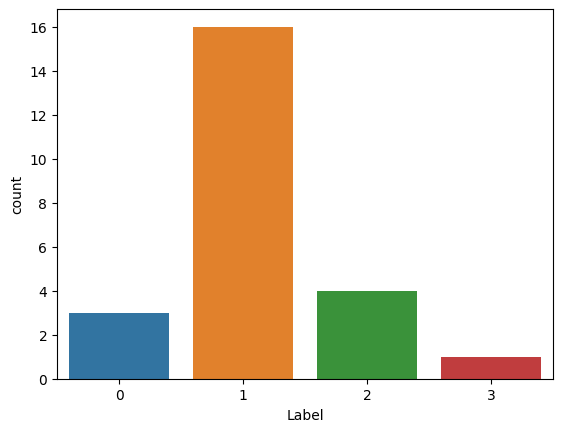

In [40]:
# Jumlah cluster
robust=dataset.copy()
robust['Label']=model2.labels_
sns.countplot(x=robust['Label'])

Analisis prediktif dilakukan bertujuan untuk mengetahui korelasi dari potensi hasil bumi daerah terhadap jumlah UMKM dan laju pertumbuhan PDRB yang dapat diketahui dengan menganalisis hasil klusterisasi yang telah dilakukan, dimana terdapat 4 kluster.

In [41]:
# Prepare dataset
hasilbumi=clustered.iloc[:,6:len(clustered.columns)-2].T.sum()
dfgambar=clustered.copy()
dfgambar=dfgambar.iloc[:,0:6]
dfgambar['HasilBumi']=hasilbumi
dfgambar['Label']=model2.labels_
dfgambar

,nama_kabupaten_kota,AGRIBISNIS,KULINER,MAKANAN,MINUMAN,Hasil Bumi,HasilBumi,Label
0,KABUPATEN BANDUNG,0,160772,117700,21820,140762.687,0.0,2
1,KABUPATEN BEKASI,5,105182,76941,14272,15365.492,0.0,0
2,KABUPATEN BOGOR,11,170682,124905,23166,500064.119,0.0,3
3,KABUPATEN CIAMIS,0,63635,46591,8634,77189.952,0.0,1
4,KABUPATEN CIANJUR,16,114126,83553,15504,180223.508,0.0,2
5,KABUPATEN CIREBON,14,114972,84172,15605,38083.128,0.0,1
6,KABUPATEN GARUT,7,117941,86322,16005,125182.560,0.0,2
7,KABUPATEN INDRAMAYU,8,86961,63625,11804,48799.635,0.0,1
8,KABUPATEN KARAWANG,1,106324,77815,14439,76510.820,0.0,0
9,KABUPATEN KUNINGAN,1,43250,31637,5872,83146.609,0.0,1


4 Cluster tersebut berisikan Kabupaten/Kota sebagai berikut.

| 0 | 1 | 2 | 3 |
| --- | --- | --- | --- |
| KABUPATEN BEKASI | KABUPATEN CIAMIS | KABUPATEN BANDUNG | KABUPATEN BOGOR |
| KABUPATEN KARAWANG | KABUPATEN CIREBON | KABUPATEN CIANJUR | |
| KOTA BANDUNG | KABUPATEN INDRAMAYU | KABUPATEN GARUT | |
| | KABUPATEN KUNINGAN | KABUPATEN SUKABUMI | |
| | KABUPATEN MAJALENGKA | | |
| | KABUPATEN PURWAKARTA | | | 
| | KABUPATEN SUBANG | | |
| | KABUPATEN SUMEDANG | | |
| | KOTA BANJAR | | |
| | KOTA BEKASI | | |
| | KOTA BOGOR | | |
| | KOTA CIMAHI | | |
| | KOTA CIREBON | | |
| | KOTA DEPOK | | |
| | KOTA SUKABUMI | | |
| | KOTA TASIKMALAYA | | |














In [42]:
# Cek mean masing-masing label
temp=dfgambar.groupby(by='Label').mean()
temp['Percentage']=temp['Hasil Bumi']/sum(temp['Hasil Bumi'])*100
temp

,AGRIBISNIS,KULINER,MAKANAN,MINUMAN,Hasil Bumi,HasilBumi,Percentage
Label,,,,,,,
0,2.0000,122727.666667,89736.666667,16648.666667,34979.14000,0.0,4.773094
1,4.8125,54480.812500,39878.312500,7394.500000,38709.31675,0.0,5.282097
2,8.5000,128816.250000,94291.250000,17486.000000,159087.40150,0.0,21.708341
3,11.0000,170682.000000,124905.000000,23166.000000,500064.11900,0.0,68.236468


Text(0.5, 1.0, 'Persentase Hasil Bumi Setiap Kluster')

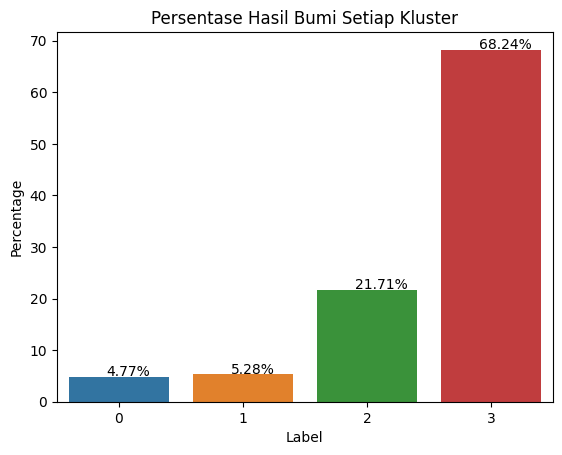

In [43]:
# Persentase hasil bumi tiap cluster
sns.barplot(data=temp,x=temp.index,y=temp['Percentage'])
[plt.text(x=temp.index[i]-0.1,y=temp.iloc[i,6]+0.2,s=str((temp.iloc[i,6]).round(decimals=2))+'%') for i in range(0,4)]
plt.title('Persentase Hasil Bumi Setiap Kluster')

Dari grafik diatas dapat diketahui kluster mana yang memiliki hasil bumi paling besar.

In [44]:
# Data prep
temp['Percentage_Agribisnis']=temp.iloc[:,0:1].apply(lambda x:x/sum(x)*100)
temp['Percentage_Kuliner']=temp.iloc[:,1:2].apply(lambda x:x/sum(x)*100)
temp['Percentage_Makanan']=temp.iloc[:,2:3].apply(lambda x:x/sum(x)*100)
temp['Percentage_Minuman']=temp.iloc[:,3:4].apply(lambda x:x/sum(x)*100)
temp['Percentage_Obat-obatan']=temp.iloc[:,4:5].apply(lambda x:x/sum(x)*100)

Text(0.5, 1.0, 'Jumlah UMKM tiap cluster')

<Figure size 1500x1000 with 0 Axes>

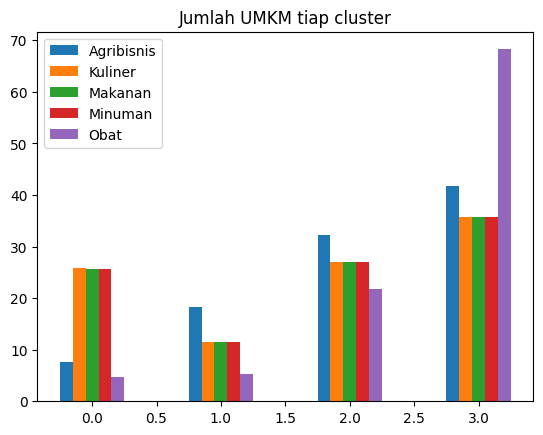

In [45]:
# Jumlah umkm tiap cluster
plt.figure(figsize=(15,10))
fig, ax = plt.subplots()
agri=ax.bar(temp.index-0.2,temp['Percentage_Agribisnis'],0.1,label='Agribisnis')
kuli=ax.bar(temp.index-0.1,temp['Percentage_Kuliner'],0.1,label='Kuliner')
makan=ax.bar(temp.index,temp['Percentage_Makanan'],0.1,label='Makanan')
minum=ax.bar(temp.index+0.1,temp['Percentage_Minuman'],0.1,label='Minuman')
obat=ax.bar(temp.index+0.2,temp['Percentage_Obat-obatan'],0.1,label='Obat')
plt.legend()
plt.title('Jumlah UMKM tiap cluster')

Grafik diatas menunjukkan cluster mana yang memiliki jumlah UMKM paling banyak dan cukup rendah. 

Text(0.5, 1.0, 'GDP Tiap Cluster')

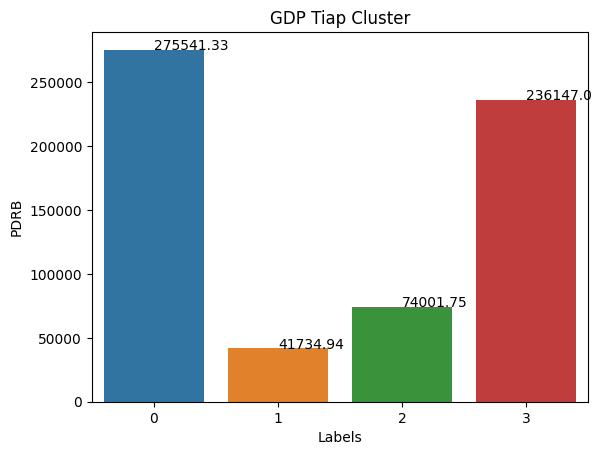

In [47]:
# GDP tiap cluster
temp=clustered.groupby(by='Labels').mean()
sns.barplot(x=temp.index,y=temp.loc[:,'PDRB'])
[plt.text(x=temp.index[i],y=temp.loc[i,'PDRB'],s=str(temp.loc[i,'PDRB'].round(decimals=2))) for i in range(0,4)]
plt.title('GDP Tiap Cluster')

Dapat diketahui daerah yang memiliki PDRB paling tinggi dan paling rendah.

In [48]:
# Melihat
kruskal_list = tuple(clustered.groupby('Labels')['Hasil Bumi'].apply(list).reset_index()['Hasil Bumi'])
h_stats, pvalue = kruskal(*kruskal_list)
print(f'''Result of {'Hasil Bumi'}
H stat: {h_stats}
P-value: {pvalue}''')

kruskal_list = tuple(clustered.groupby('Labels')['PDRB'].apply(list).reset_index()['PDRB'])
h_stats, pvalue = kruskal(*kruskal_list)
print(f'''Result of {'PDRB'}
H stat: {h_stats}
P-value: {pvalue}''')

Result of Hasil Bumi
H stat: 11.50791666666666
P-value: 0.00927377011910345
Result of PDRB
H stat: 12.10666666666667
P-value: 0.007026555962568913


Dilakukan uji statistik Kruskal Wallis, yaitu uji data nonparametrik pada data nominal yang bertujuan untuk menentukan adakah perbedaan signifikan secara statistik antara dua atau lebih kelompok variabel independen pada variabel dependen. Variabel yang diuji adalah hasil bumi dan PDRB terhadap kelompok cluster. Hipotesis nol (H0) dari uji tersebut adalah tidak ada perbedaan signifikan secara statistik antar masing-masing kelompok cluster pada kedua variabel, dan Hipotesis alternatif (Ha) adalah adanya perbedaan signifikan secara statistik antar masing-masing kelompok cluster pada kedua variabel. Tolak H0 atau terima Ha dilakukan apabila didapatkan P-Value kurang dari 0.05.  
  
Pada pengujian variabel Hasil Bumi terhadap kelompok cluster didapatkan P-Value 0.009 dan pada variabel PDRB terhadap kelompok cluster didapatkan P-Value 0.007. Sehingga hasil uji hipotesis yang didapat adalah tolak H0 atau terima Ha, yaitu terdapat perbedaan signifikan pada masing-masing kelompok cluster atau kelompok cluster dipengaruhi oleh hasil bumi dan PDRB.
  
Dari semua grafik diatas, dapat disimpulkan karakteristik masing-masing cluster.  
  
| 0 | 1 | 2 | 3 |
| --- | --- | --- | --- |
| Memiliki PDRB paling tinggi dengan jumlah UMKM cukup banyak pada sektor Kuliner, Makanan, dan Minuman, namun memiliki persentase hasil bumi paling rendah yakni 4.77% | Memiliki PDRB paling rendah dengan jumlah UMKM paling rendah pada sektor Kuliner, Makanan, dan Minuman, namun memiliki persentase hasil bumi hanya sebesar 5.28% | Memiliki PDRB cukup rendah dengan jumlah UMKM pada masing-masing sektor terbanyak kedua, disertai persentase hasil bumi sebesar 21.71% | Memiliki besar PDRB tinggi dengan jumlah UMKM terbanyak, disertai jumlah hasil bumi yang mendominasi sebesar 68.24% |

Berdasarkan pemaparan grafik dan tabel diatas maka didapatkan beberapa insights terkait analisis deskriptif yakni:
1.  Jumlah UMKM berpengaruh terhadap besar PDRB suatu daerah sebagaimana pada kluster 0, 1, 2, & 3.
2. Hasil bumi suatu daerah tidak berpengaruh terhadap besar PDRB sebagaimana kluster 0, namun dapat berpengaruh terhadap jumlah UMKM sebagaimana pada kluster 1,2, & 3.
3. Kluster 0 yakni Kabupaten Bekasi dan Karawang memiliki hasil bumi rendah karena daerah tersebut merupakan kawasan industri manufaktur dan Kota Bandung merupakan kawasan industri retail, sehingga hasil bumi yang dimiliki akan terbatas.  
  
Setelah dilakukan analisis prediktif, maka dapat dilakukan analisis prescriptive berupa rekomendasi yakni sebagai berikut:
1. Mengoptimalisasi UMKM daerah berkarakteristik kluster 0 yang terdapat kawasan industri, memerlukan kerjasama antar daerah dalam memasok bahan baku produk UMKM untuk menjaga produktivitas UMKM atau penciptaan UMKM baru agar resillence ketika kondisi krisis.
2. Mengoptimalisasi UMKM daerah berkarakteristik kluster 1 yakni daerah yang memiliki potensi besar terhadap hasil bumi, memerlukan injeksi modal baik dari alokasi APBD atau sumber lain untuk meningkatkan kapasitas produksi hasil bumi daerah, serta program pembinaan terkait pengelolaan sumber bahan baku & pemasaran agar UMKM memiliki daya saing.
3. Mengoptimalisasi UMKM daerah berkarakteristik kluster 1 yakni daerah yang memiliki kesulitan pemodalan, permasaran, persaingan, dan bahan baku, memerlukan injeksi modal untuk meningkatkan kapasitas produksi hasil bumi daerah & program pembinaan berupa edukasi terkait pemasaran agar UMKM memiliki daya saing.
4. Mengoptimalisasi UMKM berkarakteristik kluster 3 yakni daerah yang dapat menjadi model bagi daerah lain dalam memanfaatkan UMKM sebagai pondasi perekonomian, dapat berupa program pembinaan yakni edukasi terkait pemasaran agar UMKM memiliki daya saing untuk membentuk citra daerah terkait produk UMKM.
5. Optimalisasi UMKM pada setiap kluster harus berfokus kepada pengembangan UMKM baik dalam segi jumlah ataupun penciptaan produk unggulan, didukung oleh cukupnya hasil bumi setiap daerah. Sehingga, setiap produk yang dipasarkan memperoleh nilai tambahan secara optimal dan berkelanjutan yakni terbentuknya daya saing produk UMKM ditingkat nasional/internasional sampai dengan menjadi citra suatu daerah, dengan demikian pertumbuhan perekonomian daerah pun dapat dijaga.

### Dashboard

##### Preparation

Dilakukan persiapan dataset berdasarkan longitude dan latitude.

In [49]:
# Membuat dataset longitude dan latitude
geolocator = Nominatim(user_agent="MyApp")
a = list(clustered['nama_kabupaten_kota'])
x=[]
for i in a: 
    location = geolocator.geocode(i)
    x.append([i,location.latitude,location.longitude])

    location = pd.DataFrame(columns=['nama_kabupaten_kota','latitude', 'longitude'],
                     data=x)
location.drop(location.index[[0,8,10,13,14,22]],axis=0,inplace=True)
databaru = {'nama_kabupaten_kota': ['KABUPATEN BANDUNG','KABUPATEN KARAWANG','KABUPATEN SUKABUMI','KABUPATEN SUMEDANG','KOTA SUKABUMI','KABUPATEN SUBANG'], 
'latitude':[-7.1341, -6.3227,-6.9277,-6.8329,-6.9277,-6.560035], 
'longitude':[107.6215,107.3376,106.9300,107.9532,106.9300,107.7608203]}
databaru =pd.DataFrame(databaru)
location = location.append(databaru)
location.reset_index(drop=True)
clustered = pd.merge(clustered,location, on ='nama_kabupaten_kota')
clustered

,nama_kabupaten_kota,AGRIBISNIS,KULINER,MAKANAN,MINUMAN,Hasil Bumi,PDRB,Labels,latitude,longitude
0,KABUPATEN BANDUNG,0,160772,117700,21820,140762.687,123049,2,-7.134100,107.621500
1,KABUPATEN BEKASI,5,105182,76941,14272,15365.492,317943,0,-6.202728,107.164939
2,KABUPATEN BOGOR,11,170682,124905,23166,500064.119,236147,3,-6.545325,107.001742
3,KABUPATEN CIAMIS,0,63635,46591,8634,77189.952,31974,1,-7.327802,108.351922
4,KABUPATEN CIANJUR,16,114126,83553,15504,180223.508,47523,2,-6.728819,107.016557
5,KABUPATEN CIREBON,14,114972,84172,15605,38083.128,49561,1,-6.711678,108.559296
6,KABUPATEN GARUT,7,117941,86322,16005,125182.560,58043,2,-7.216823,107.901703
7,KABUPATEN INDRAMAYU,8,86961,63625,11804,48799.635,79286,1,-6.441854,108.176547
8,KABUPATEN KARAWANG,1,106324,77815,14439,76510.820,225064,0,-6.322700,107.337600
9,KABUPATEN KUNINGAN,1,43250,31637,5872,83146.609,25618,1,-6.973770,108.523769


#### Dashboard

Akses tableau: [link](https://public.tableau.com/app/profile/afifah3349/viz/ProjectTDSN-RotiBakarTeam-2022/Dashboard1?publish=yes)

* **Dashboard Layout 1**

![Getting Started](Dashboard1.png)

* **Dashboard Layout 2**

![Getting Started](Dashboard2.png)

* **Dashboard Layout 3**

![Getting Started](Dashboard3.png)

### Kesimpulan

“Optimalisasi UMKM Jawa Barat Berdasarkan Potensi Hasil Bumi Daerah Dengan Analisa Hasil Segmentasi Menggunakan Model Machine Learning Clustering” dapat menjadi media pendukung bagi stakeholder dalam mempermudah pengambilan keputusan terkait pengembangan potensi wilayah untuk optimalisasi UMKM berupa penciptaan/pengembangan UMKM dalam menciptakan daya saing produk UMKM. 
